In [1]:
import pandas as pd
import numpy as np
import json
import glob
import tqdm
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

from model_drift import settings

In [2]:
from model_drift.data.padchest import PadChest

pc = PadChest.from_csv()
pc.prepare()

In [3]:
label_cols = [
        "No Finding",
        "Edema",
        "Cardiomegaly",
        "Pleural Effusion",
        "Opacity",
        "Atelectasis",
        "Pleural Abnormalities",
        "Pneumonia",
        "Consolidation",
        "Lesion",
    ]

def converter(value):
    if isinstance(value, list):
        d = {label_cols[i]:vv for i, vv in enumerate(value)}
        return d
    return value

In [4]:
df = []

jsonl_dir = str(settings.TOP_DIR.joinpath("results", 'classifier', 'finetuned'))
jsonl_files = glob.glob(f"{jsonl_dir}/*.jsonl")

for fn in tqdm.tqdm_notebook(jsonl_files):
    with open(fn, 'r') as f:
        for line in tqdm.tqdm_notebook(f.readlines()):
            df.append({k: converter(v) for k, v in json.loads(line).items()})
print(len(df))
df = pd.json_normalize(df)
print(len(df))
df.head()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40205 [00:00<?, ?it/s]

  0%|          | 0/40204 [00:00<?, ?it/s]

160819
160819


,index,score.No Finding,score.Edema,score.Cardiomegaly,score.Pleural Effusion,score.Opacity,score.Atelectasis,score.Pleural Abnormalities,score.Pneumonia,score.Consolidation,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
0,20536686640136348236148679891455886468_k6ga29.png,-3.221914,-9.562931,0.198151,-4.758427,-3.175417,-2.785142,-1.227306,-4.715621,-6.063536,...,0.038349,7.028155e-05,0.549376,0.008506,0.040101,0.058132,0.226653,0.008875,0.002321,0.029256
1,113855343774216031107737439268243531979_3k951n...,-0.897817,-10.251114,-3.098645,-7.502988,-3.877130,-4.079744,-5.741298,-5.912987,-7.896447,...,0.289499,3.531689e-05,0.043163,0.000551,0.020290,0.016631,0.003200,0.002697,0.000372,0.016891
2,313723174271082992847610802266403640553-4_hhi4...,-5.682134,-14.645055,-4.623094,0.152122,0.859045,-2.138089,0.754930,-1.412256,-1.001147,...,0.003395,4.362479e-07,0.009727,0.537957,0.702461,0.105449,0.680252,0.195879,0.268716,0.005723
3,105529804483623054726294337265160703666_6zn76a...,-0.597147,-11.796655,-2.730703,-7.057621,-4.064648,-2.696711,-4.415497,-5.457584,-6.130983,...,0.354997,7.529649e-06,0.061186,0.000860,0.016879,0.063168,0.011944,0.004246,0.002170,0.010872
4,102185472428957491598043403159908631419_zb8kco...,-2.670287,-11.569566,-3.732254,-4.284808,-3.327652,-2.378380,-3.725797,-3.307613,-4.915821,...,0.064750,9.449250e-06,0.023379,0.013589,0.034635,0.084836,0.023527,0.035311,0.007276,0.008899


In [5]:
pc.merge(df, left_on="ImageID", right_on="index", how='inner')
pc.df.head()

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.038349,0.000070,0.549376,0.008506,0.040101,0.058132,0.226653,0.008875,0.002321,0.029256
1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,LATERAL,L,Manual review of DICOM fields,...,0.014859,0.000072,0.681845,0.013174,0.066258,0.053979,0.222970,0.002961,0.000704,0.018725
2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.074728,0.000047,0.213870,0.002933,0.119118,0.118933,0.042514,0.017703,0.005187,0.015234
3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.288212,0.000013,0.084155,0.000468,0.026300,0.048805,0.006164,0.001331,0.000865,0.016157
4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,LATERAL,L,Manual review of DICOM fields,...,0.289499,0.000035,0.043163,0.000551,0.020290,0.016631,0.003200,0.002697,0.000372,0.016891


In [6]:
train, val, test = pc.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)

In [7]:
test.df

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
StudyDate,,,,,,,,,,,,,,,,,,,,,
2014-09-15,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.038349,7.028155e-05,0.549376,0.008506,0.040101,0.058132,0.226653,0.008875,0.002321,0.029256
2015-09-14,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,LATERAL,L,Manual review of DICOM fields,...,0.014859,7.170290e-05,0.681845,0.013174,0.066258,0.053979,0.222970,0.002961,0.000704,0.018725
2015-09-14,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.074728,4.711197e-05,0.213870,0.002933,0.119118,0.118933,0.042514,0.017703,0.005187,0.015234
2015-07-17,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.288212,1.322428e-05,0.084155,0.000468,0.026300,0.048805,0.006164,0.001331,0.000865,0.016157
2015-07-17,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,LATERAL,L,Manual review of DICOM fields,...,0.289499,3.531689e-05,0.043163,0.000551,0.020290,0.016631,0.003200,0.002697,0.000372,0.016891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-02,216840111366964014008416513202014183081250929_...,31,20140702,216840111366964014008416513202014183081250929,34988246402240726372237990050350430449,1966-01-01,M,NaN,L,Manual review of DICOM fields,...,0.151265,1.345793e-04,0.014380,0.005770,0.133577,0.045501,0.059701,0.088189,0.004451,0.008816
2014-07-17,216840111366964014008416513202014198084124175_...,31,20140717,216840111366964014008416513202014198084124175,296078740818133445674743688228155385694,1951-01-01,M,NaN,AP_horizontal,Manual review of DICOM fields,...,0.033220,9.169936e-07,0.006692,0.011575,0.105257,0.166004,0.019219,0.034381,0.028592,0.010844
2014-07-02,216840111366964014008416513202014178134433930_...,31,20140702,216840111366964014008416513202014178134433930,95865338819469117525119991107078787462,1966-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.691735,5.973045e-05,0.019511,0.001613,0.032196,0.012972,0.011960,0.007710,0.001433,0.012357


In [9]:
sample = test.df.sample(5000)

sample

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
StudyDate,,,,,,,,,,,,,,,,,,,,,
2014-07-17,216840111366964014008416513202014188184539828_...,31,20140717,216840111366964014008416513202014188184539828,335950534064173509575307051440354886138,1946-01-01,F,NaN,L,Manual review of DICOM fields,...,0.230422,1.159589e-05,0.009903,0.008458,0.057842,0.068450,0.042231,0.055579,0.003444,0.023854
2016-09-19,103272165959813089588691389477734791617_9d0dfz...,8,20160919,103272165959813089588691389477734791617,109482794531785873557885505321435278445,1943-01-01,M,LL,L,Manual review of DICOM fields,...,0.305207,2.386194e-05,0.065069,0.000317,0.020894,0.009562,0.002005,0.009465,0.000415,0.017948
2015-10-14,97601743350941283913496218237879765341_x66sf4.png,12,20151014,97601743350941283913496218237879765341,201664844428160273591152502878948067917,1965-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0.408322,2.773461e-05,0.003025,0.000731,0.033299,0.028217,0.004835,0.004203,0.000814,0.018468
2014-06-22,216840111366964014008416513202014173160924428_...,25,20140622,216840111366964014008416513202014173160924428,4229216390214335267419170698464005466,1999-01-01,M,NaN,PA,Manual review of DICOM fields,...,0.604410,4.177875e-07,0.000070,0.003492,0.214512,0.019179,0.013495,0.158705,0.023561,0.016736
2015-01-20,106700336717044272880726422061056904209_5zooew...,5,20150120,106700336717044272880726422061056904209,16686234423927641171800382878276115601,1958-01-01,F,NaN,L,Manual review of DICOM fields,...,0.473804,3.282274e-05,0.012171,0.013627,0.134684,0.024707,0.037787,0.120909,0.004572,0.009974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-19,135177816631007827175742472951746191325_fm3z7l...,0,20160119,135177816631007827175742472951746191325,181864563815100225831361587901716267352,1964-01-01,F,NaN,PA,Manual review of DICOM fields,...,0.873904,2.103822e-06,0.002335,0.000718,0.020793,0.008522,0.003369,0.006426,0.000908,0.006018
2017-05-30,90200623492875679403450505604466222142_2mbljt.png,8,20170530,90200623492875679403450505604466222142,326166504491074440734387223467648653630,1958-01-01,M,NaN,L,Manual review of DICOM fields,...,0.263919,7.959548e-05,0.012956,0.001028,0.071540,0.007554,0.005082,0.033398,0.001801,0.051176
2015-04-27,6272752592385784080592777604929995855_2_xi8g8w...,8,20150427,6272752592385784080592777604929995855_2,33280163775055767481954213736346611228,1962-01-01,M,NaN,L,Manual review of DICOM fields,...,0.086393,1.664420e-05,0.015362,0.020668,0.605268,0.046155,0.029590,0.336747,0.201196,0.020024


In [10]:
list(sample)

['ImageID',
 'ImageDir',
 'StudyDate_DICOM',
 'StudyID',
 'PatientID',
 'PatientBirth',
 'PatientSex_DICOM',
 'ViewPosition_DICOM',
 'Projection',
 'MethodProjection',
 'Pediatric',
 'Modality_DICOM',
 'Manufacturer_DICOM',
 'PhotometricInterpretation_DICOM',
 'PixelRepresentation_DICOM',
 'PixelAspectRatio_DICOM',
 'SpatialResolution_DICOM',
 'BitsStored_DICOM',
 'WindowCenter_DICOM',
 'WindowWidth_DICOM',
 'Rows_DICOM',
 'Columns_DICOM',
 'XRayTubeCurrent_DICOM',
 'Exposure_DICOM',
 'ExposureInuAs_DICOM',
 'ExposureTime',
 'RelativeXRayExposure_DICOM',
 'ReportID',
 'Report',
 'MethodLabel',
 'Labels',
 'Localizations',
 'LabelsLocalizationsBySentence',
 'labelCUIS',
 'LocalizationsCUIS',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'No Finding',
 'Opacity',
 'Pleural Abnormalities',
 'Pleural Effusion',
 'Pneumonia',
 'StudyDate',
 'Frontal',
 'age',
 'index',
 'score.No Finding',
 'score.Edema',
 'score.Cardiomegaly',
 'score.Pleural Effusion',
 'score.O

In [13]:
score_cols = [f"activation.{c}" for c in label_cols]

['activation.No Finding',
 'activation.Edema',
 'activation.Cardiomegaly',
 'activation.Pleural Effusion',
 'activation.Opacity',
 'activation.Atelectasis',
 'activation.Pleural Abnormalities',
 'activation.Pneumonia',
 'activation.Consolidation',
 'activation.Lesion']

In [14]:


X.head()

,activation.No Finding,activation.Edema,activation.Cardiomegaly,activation.Pleural Effusion,activation.Opacity,activation.Atelectasis,activation.Pleural Abnormalities,activation.Pneumonia,activation.Consolidation,activation.Lesion
StudyDate,,,,,,,,,,
2014-07-17,0.230422,1.159589e-05,0.009903,0.008458,0.057842,0.068450,0.042231,0.055579,0.003444,0.023854
2016-09-19,0.305207,2.386194e-05,0.065069,0.000317,0.020894,0.009562,0.002005,0.009465,0.000415,0.017948
2015-10-14,0.408322,2.773461e-05,0.003025,0.000731,0.033299,0.028217,0.004835,0.004203,0.000814,0.018468
2014-06-22,0.604410,4.177875e-07,0.000070,0.003492,0.214512,0.019179,0.013495,0.158705,0.023561,0.016736
2015-01-20,0.473804,3.282274e-05,0.012171,0.013627,0.134684,0.024707,0.037787,0.120909,0.004572,0.009974


In [15]:
Y.head()

,No Finding,Edema,Cardiomegaly,Pleural Effusion,Opacity,Atelectasis,Pleural Abnormalities,Pneumonia,Consolidation,Lesion
StudyDate,,,,,,,,,,
2014-07-17,0,0,0,0,0,0,0,0,0,0
2016-09-19,0,0,1,0,0,0,1,0,0,0
2015-10-14,1,0,0,0,0,0,0,0,0,0
2014-06-22,1,0,0,0,0,0,0,0,0,0
2015-01-20,1,0,0,0,0,0,0,0,0,0


In [31]:
roc_auc_score(Y.values, X.values, average='micro')

0.9024408727028502

In [59]:
import torch
from torchmetrics import AUROC
from torchmetrics.functional import auroc
def get_auc(sample):
    label_cols = [
        "No Finding",
        "Edema",
        "Cardiomegaly",
        "Pleural Effusion",
        "Opacity",
        "Atelectasis",
        "Pleural Abnormalities",
        "Pneumonia",
        "Consolidation",
        "Lesion",
    ]
    score_cols = [f"activation.{c}" for c in label_cols]
    X = sample[score_cols]
    Y = sample[label_cols]
    out = {}
    for c in label_cols:
        try:
            val = auroc(torch.tensor(X[f"activation.{c}"].values), torch.tensor(Y[c].values)).numpy()
        except:
            val = float('NaN')
        out[f'auroc.{c}'] = val
    out["counts"] = Y.sum(axis=0).to_dict()
    out["freq"] = Y.mean(axis=0).to_dict()
    return out







In [60]:
auroc_df = rolling_window_dt_apply(test.df, get_auc, min_periods=500)

100%|██████████| 1417/1417 [00:13<00:00, 103.77it/s]


In [62]:
auc_cols = [f"auroc.{c}" for c in label_cols]

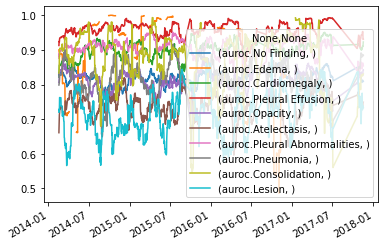

In [77]:
for c in auc_cols:
    auroc_df[c] = pd.to_numeric(auroc_df[c], errors='coerce')

auroc_df[auc_cols].astype(float).plot()

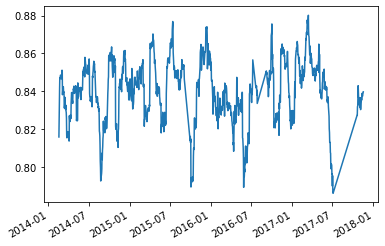

In [79]:
auroc_df[auc_cols].astype(float).mean(axis=1).plot()

In [80]:
auroc_df_val = rolling_window_dt_apply(val.df, get_auc, min_periods=500)

100%|██████████| 365/365 [00:04<00:00, 87.30it/s]


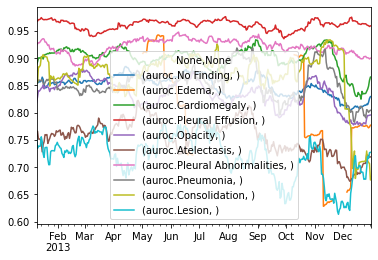

In [81]:
for c in auc_cols:
    auroc_df_val[c] = pd.to_numeric(auroc_df_val[c], errors='coerce')

auroc_df_val[auc_cols].astype(float).plot()

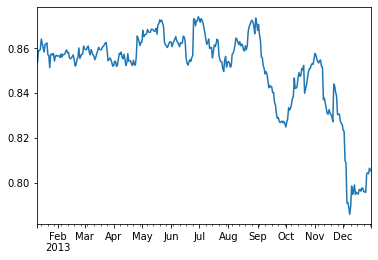

In [82]:
auroc_df_val[auc_cols].astype(float).mean(axis=1).plot()

In [85]:
pc.df = pc.df.set_index('StudyDate')

In [86]:
auroc_df_all = rolling_window_dt_apply(pc.df, get_auc, min_periods=500)

100%|██████████| 3852/3852 [00:38<00:00, 99.24it/s] 


In [129]:
settings.PADCHEST_SPLIT_DATES

['2013-01-01', ' 2014-01-01']

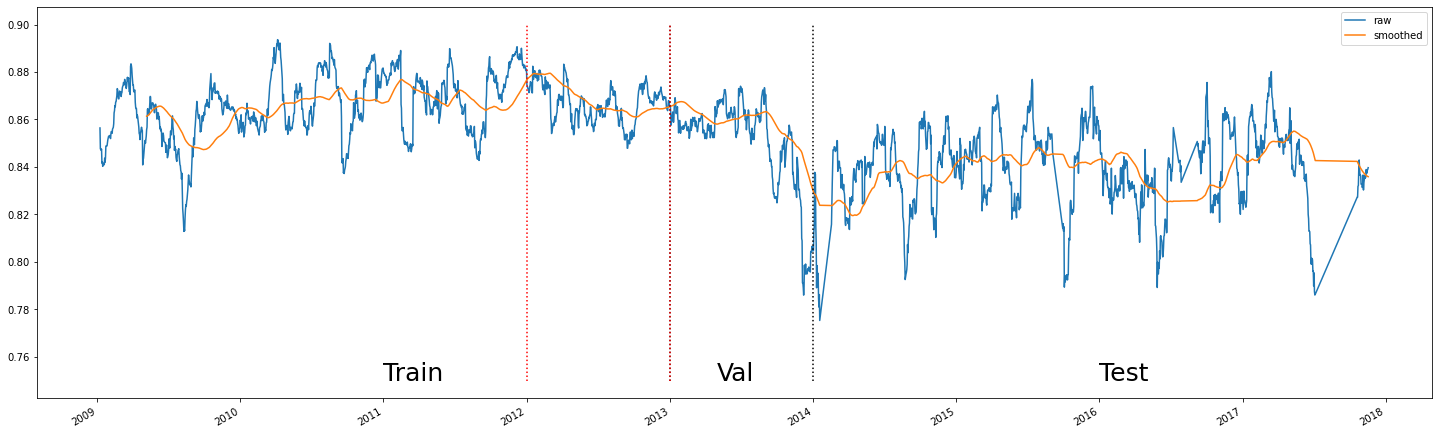

In [132]:
split_dates = pd.to_datetime(settings.PADCHEST_SPLIT_DATES)

ax = auroc_df_all[auc_cols].astype(float).mean(axis=1).rolling(1).mean().plot(figsize=(25, 8), label='raw')
roll=30*4
ax = auroc_df_all[auc_cols].astype(float).mean(axis=1).rolling(roll).mean().plot(figsize=(25, 8), label='smoothed', ax=ax)

ax.plot([split_dates[0], split_dates[0]], [.75, .90], ':k')
ax.plot([split_dates[1], split_dates[1]], [.75, .90], ':k')

y = .75
ax.text(pd.to_datetime('2011-01-1'), y, "Train", size=25)
ax.text(pd.to_datetime('2013-05-1'), y, "Val", size=25)
ax.text(pd.to_datetime('2016-01-1'), y, "Test", size=25)

split_dates = pd.to_datetime(['2012-01-01', ' 2013-01-01'])
ax.plot([split_dates[0], split_dates[0]], [.75, .90], ':r')
ax.plot([split_dates[1], split_dates[1]], [.75, .90], ':r')

ax.legend()

Timestamp('2013-07-02 12:00:00')